*Initial implementation of the Dining Philosophers which simply models the story as code.*

The life of a philosopher consists of an alternation of thinking and eating.

Five philosophers, numbered from 0 through 4 are living in a house where the table laid for them, each philosopher having his own place at the table:

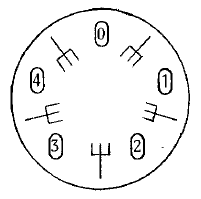

Their only problem - besides those of philosophy - is that the dish served is a very difficult kind of spaghetti, that has to be eaten with two forks. There are two forks next to each plate, so that presents no difficulty: as a consequence, however, no two neighbours may be eating simultaneously.

### User Stories

* As a PHILOSOPHER I want to...
    * think *so I can ask questions and get answers*
    * eat *so I can continue thinking*
    * have acceess to two forks so I can eat

Text in italic is inferred.

### Assumptions

* At any given moment, a philosopher is either thinking or eating. If the philosopher is not eating, it can be assumed that he is thinking and vice-versa.

### Design Decisions

* Philosophers think by default.
* Philosophers think until they start eating and eat until they start thinking.
* Forks are modelled as classes so they can be passed by reference to each philosopher.

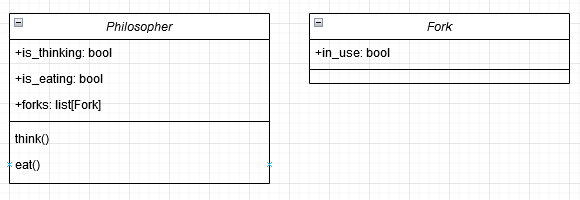

In [88]:
class ForkInUse(Exception):
    pass

In [89]:
class Fork:
    def __init__(self):
        self.in_use = False
    
    def __repr__(self):
        return f'<Fork [in_use={self.in_use}]>'

In [90]:
class Philosopher:
    def __init__(self, forks):
        self.is_thinking = True
        self.is_eating = False
        self.forks = forks
    
    def think(self):
        self.forks[0].in_use = False
        self.forks[1].in_use = False
        
        self.is_thinking = True
        self.is_eating = False
    
    def eat(self):
        if self.forks[0].in_use or self.forks[1].in_use:
            raise ForkInUse
        
        self.forks[0].in_use = True
        self.forks[1].in_use = True
        
        self.is_eating = True
        self.is_thinking = False
    
    def __repr__(self):
        return f'<Philosopher [eating={self.is_eating} thinking={self.is_thinking}]>'

In [91]:
n_philosophers = 5

forks = [Fork() for _ in range(n_philosophers)]  # as many forks as philosophers

philosophers = [
    Philosopher(
        (forks[x], forks[(x + 1) % len(forks)])
    ) for x in range (n_philosophers)
]

In [92]:
philosophers[0].eat()

In [93]:
philosophers[1].eat()

ForkInUse: 

In [94]:
philosophers[2].eat()

In [95]:
philosophers[4].eat()

ForkInUse: 

In [96]:
philosophers[0].think()
philosophers[4].eat()